In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv(r"vgsales.csv")

In [11]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.drop(['Name', 'Platform','Genre','Publisher'], axis='columns', inplace=True)

In [13]:
df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [14]:
nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df.dropna(inplace=True)

In [15]:
y = df.NA_Sales
x = df.drop(['NA_Sales'], axis=1)

In [16]:
y

0        41.49
1        29.08
2        15.85
3        15.75
4        11.27
         ...  
16593     0.01
16594     0.01
16595     0.00
16596     0.00
16597     0.01
Name: NA_Sales, Length: 16327, dtype: float64

In [17]:
x

,Rank,Year,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,29.02,3.77,8.46,82.74
1,2,1985.0,3.58,6.81,0.77,40.24
2,3,2008.0,12.88,3.79,3.31,35.82
3,4,2009.0,11.01,3.28,2.96,33.00
4,5,1996.0,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,16596,2002.0,0.00,0.00,0.00,0.01
16594,16597,2003.0,0.00,0.00,0.00,0.01
16595,16598,2008.0,0.00,0.00,0.00,0.01
16596,16599,2010.0,0.01,0.00,0.00,0.01


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [19]:
print(X_train.head(), X_test.head())

      Rank    Year  EU_Sales  JP_Sales  Other_Sales  Global_Sales
6168  6170  2007.0      0.00      0.00         0.02          0.28
5193  5195  2009.0      0.00      0.00         0.03          0.36
1841  1843  1994.0      0.14      0.00         0.03          1.11
6162  6164  2002.0      0.00      0.28         0.00          0.28
4911  4913  1998.0      0.15      0.00         0.03          0.39         Rank    Year  EU_Sales  JP_Sales  Other_Sales  Global_Sales
6435    6437  2012.0      0.06      0.00         0.02          0.27
2815    2817  2003.0      0.19      0.00         0.01          0.73
7543    7545  2011.0      0.05      0.10         0.02          0.20
3728    3730  2010.0      0.16      0.18         0.09          0.54
15510  15513  2003.0      0.02      0.00         0.00          0.02


In [20]:
X_train.shape, Y_train.shape

((13061, 6), (13061,))

In [21]:
X_test.shape, Y_test.shape

((3266, 6), (3266,))

In [22]:
model = linear_model.LinearRegression()

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_pred = model.predict(X_test)

In [25]:
Y_pred

array([ 1.89968054e-01,  5.30047061e-01,  2.98970060e-02, ...,
        2.20111441e-01, -1.89491420e-04,  5.99078556e-02])

In [26]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-7.91323949e-08  1.80382088e-05 -9.99831798e-01 -9.99733896e-01
 -9.99703203e-01  9.99860854e-01]
Intercept: -0.03579390507227609
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


In [27]:
r2_score(Y_test, Y_pred)

0.9999161031362614

In [28]:
np.array(Y_test)

array([0.18, 0.52, 0.04, ..., 0.21, 0.  , 0.06])

In [29]:
Y_pred

array([ 1.89968054e-01,  5.30047061e-01,  2.98970060e-02, ...,
        2.20111441e-01, -1.89491420e-04,  5.99078556e-02])

<AxesSubplot:xlabel='NA_Sales'>

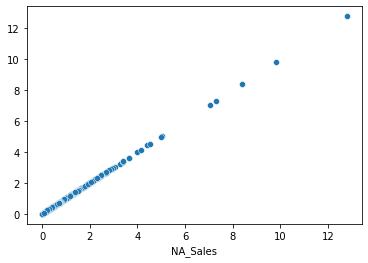

In [33]:
sns.scatterplot(Y_test, Y_pred)

In [31]:
print('Difference between test and pred:', Y_test, Y_pred)

Difference between test and pred: 6435     0.18
2815     0.52
7543     0.04
3728     0.12
15510    0.00
         ... 
16287    0.01
15494    0.01
3853     0.21
5784     0.00
8409     0.06
Name: NA_Sales, Length: 3266, dtype: float64 [ 1.89968054e-01  5.30047061e-01  2.98970060e-02 ...  2.20111441e-01
 -1.89491420e-04  5.99078556e-02]
